# Explore the dataset Reviews

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

Customs util funtions 

In [3]:
import utils as u
from importlib import reload as reload
reload(u)
help(u)


Help on module utils:

NAME
    utils

FUNCTIONS
    clean_and_tokenize(text)
    
    count_words(texts, voc=None)
    
    n_perceentage_random_sample(df, frac_per_class, random_state=42)
        Randomly sample a fraction (percentage) of entries from each class in the dataframe.
        
        Parameters
        ----------
        df : pandas.DataFrame
            DataFrame containing a 'rating' column to group by.
        frac_per_class : float
            Fraction of samples to draw from each class (e.g. 0.2 for 20%).
        random_state : int, optional
            Random seed for reproducibility.
        
        Returns
        -------
        sampled_df : pandas.DataFrame
            DataFrame containing the sampled entries.
    
    n_random_sample(df, class_col='rating', n_per_class=5, random_state=42)
        Randomly sample the same number of entries from each class in a dataframe.
        
        Parameters
        ----------
        df : pandas.DataFrame
            D

##### Load the datasets

In [4]:
interactions_df = pd.read_csv('data/raw/RAW_interactions.csv' )
recipes_df      = pd.read_csv('./data/raw/RAW_recipes.csv')

In [5]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


Check if the interactions dataset has empty values in user_id, recipe_id or rating columns

In [6]:
empty_lines_interactions = interactions_df[['user_id', 'recipe_id', 'rating']].isna().any(axis=1)
print(f"Number of empty lines in interactions dataset: {empty_lines_interactions.sum()}")


Number of empty lines in interactions dataset: 0


In [7]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Check if the interactions dataset has empty values in id or contributor_id columns

In [8]:
empty_lines_recipes = recipes_df[['id', 'contributor_id']].isna().any(axis=1)
print(f"Number of empty lines in recipes dataset: {empty_lines_recipes.sum()}")

Number of empty lines in recipes dataset: 0


# I Basic Stats

### Distributions of the ratings

<Axes: >

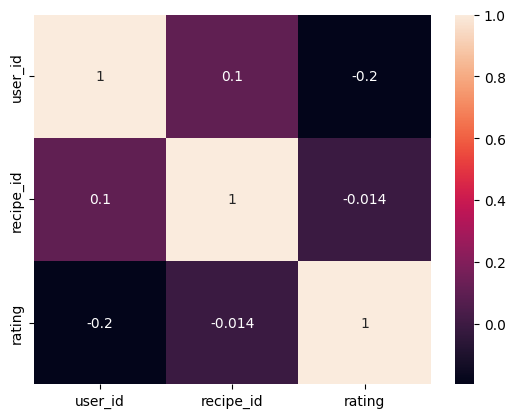

In [9]:
sns.heatmap(interactions_df[['user_id', 'recipe_id', 'rating']].astype(float).corr(), annot=True)

We can see that the correlations between user_id, recipe_id and rating are very low. This means that there is no strong relationship between the user and the rating they give, or the recipe and the rating it receives.

### I.I Mean ratings per user

In [10]:
mean_ratings_user_id = interactions_df.groupby('user_id')['rating'].mean().reset_index()
mean_ratings_user_id = mean_ratings_user_id.rename(columns={'rating': 'mean_rating'})
mean_ratings_user_id.head()

,user_id,mean_rating
0,1533,4.710938
1,1535,4.473552
2,1581,5.000000
3,1634,3.616667
4,1676,4.677419


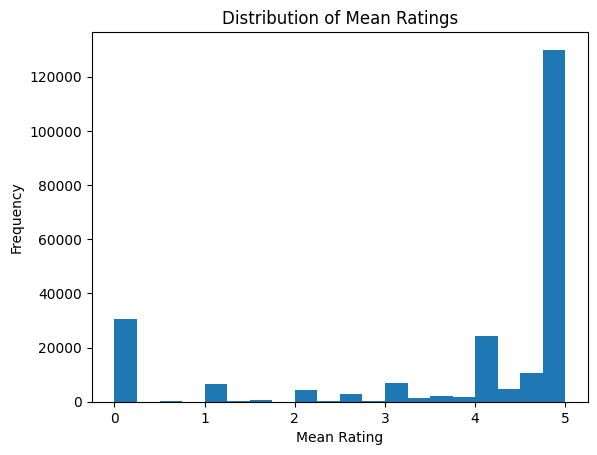

In [11]:
plt.hist(mean_ratings_user_id['mean_rating'], bins=20)
plt.title('Distribution of Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.show()

#### We can see that the ratings are either very high or very low (Not a gaussian distribution). Most of the users give high ratings.

In [12]:
mean_ratings_recipe_id = interactions_df.groupby('recipe_id')['rating'].mean().reset_index()
mean_ratings_recipe_id = mean_ratings_recipe_id.rename(columns={'rating': 'mean_rating'})
mean_ratings_recipe_id.head()

,recipe_id,mean_rating
0,38,4.250000
1,39,3.000000
2,40,4.333333
3,41,4.500000
4,43,1.000000


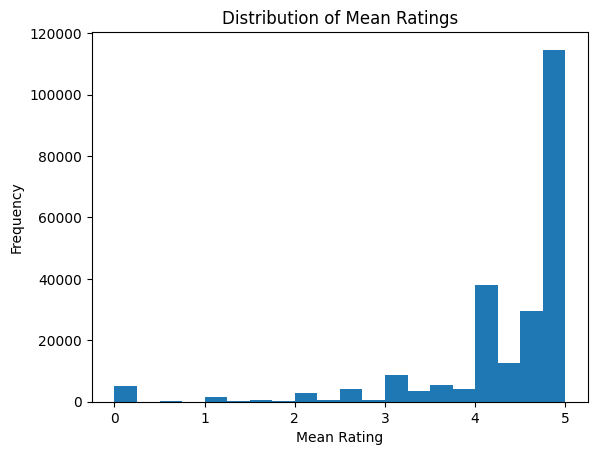

In [13]:
plt.hist(mean_ratings_recipe_id['mean_rating'], bins=20)
plt.title('Distribution of Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.show()

On peut observer que la plupart des utilisateurs donnent des notes élevées, tandis que quelques-uns donnent des notes très basses. De même, la majorité des recettes ont des notes moyennes élevées.

In [14]:
z = (mean_ratings_recipe_id['mean_rating'] - mean_ratings_recipe_id['mean_rating'].mean()) / mean_ratings_recipe_id['mean_rating'].std(ddof=1)

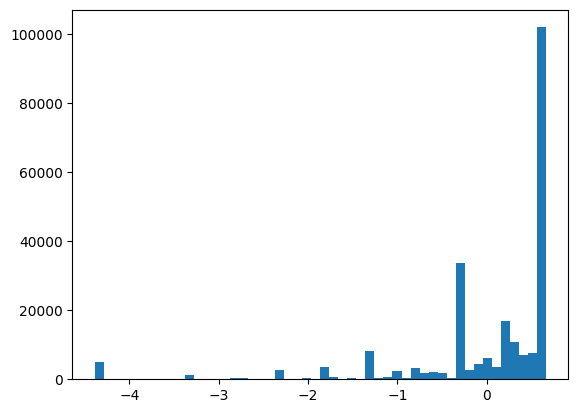

In [15]:
plt.hist(z, bins=50)
plt.show()

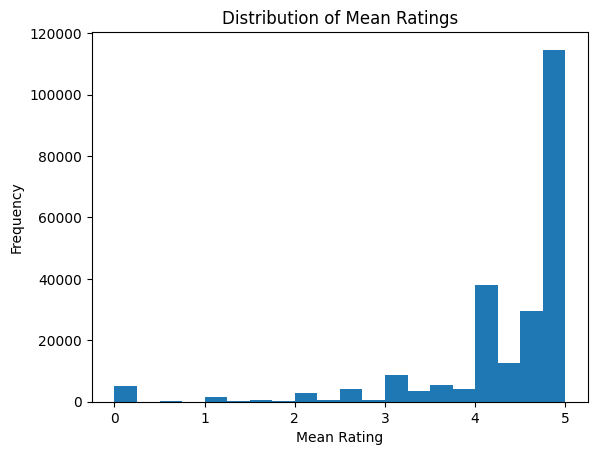

In [26]:
plt.hist(mean_ratings_recipe_id['mean_rating'], bins=20)
plt.title('Distribution of Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_ratings_recipe_id = interactions_df.groupby('recipe_id')['rating'].mean().reset_index()
mean_ratings_recipe_id = mean_ratings_recipe_id.rename(columns={'rating': 'mean_rating'})
mean_ratings_recipe_id.head()

# II Link between the recipes and the ratings

In [27]:
merged_df = pd.merge(interactions_df, recipes_df, left_on='recipe_id', right_on='id', how='inner')
merged_df.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


<Axes: >

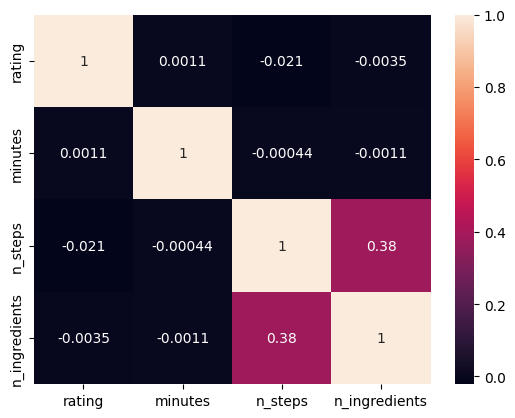

In [28]:
sns.heatmap(merged_df[['rating', 'minutes', 'n_steps', 'n_ingredients']].corr(), annot=True)

# III Link between the recipes and their reviews

The reviews had some empty values that we have to drop before processing them.

In [16]:
reviews_l = interactions_df['review'].to_list()
clean_interactions_df = interactions_df[['rating','review']].dropna()
print(f'Number of reviews before cleaning: {len(reviews_l)}')
print(f'Number of reviews after cleaning: {len(clean_interactions_df)}')
print(f'Printing the first 5 cleaned reviews:\n{clean_interactions_df.head()}')

Number of reviews before cleaning: 1132367
Number of reviews after cleaning: 1132198
Printing the first 5 cleaned reviews:
   rating                                             review
0       4  Great with a salad. Cooked on top of stove for...
1       5  So simple, so delicious! Great for chilly fall...
2       4  This worked very well and is EASY.  I used not...
3       5  I made the Mexican topping and took it to bunk...
4       5  Made the cheddar bacon topping, adding a sprin...


In [17]:
clean_interactions_list = clean_interactions_df['review'].to_list()
print(f'Printing the first 5 cleaned reviews:\n{clean_interactions_list[:5]}')

Printing the first 5 cleaned reviews:
['Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.', "So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!", 'This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!', 'I made the Mexican topping and took it to bunko.  Everyone loved it.', 'Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!']


### We will create a random sample of certain number of the reviews of each class to be able to process them.


In [18]:
NB_SAMPLES_PER_CLASS = 1000
sample_interactions_df = u.n_random_sample(df=clean_interactions_df[['rating','review']],class_col='rating', n_per_class=NB_SAMPLES_PER_CLASS, random_state=42)
sample_interactions_list = sample_interactions_df['review'].to_list() 

d:\Work\Telecom Paris\Kit Big Data\Project\mangetamain_17_10\mangetamain\utils.py:128: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(n_per_class, len(x)), random_state=random_state))


### We will try to find if there are any correlations between the ratings and the words used in the reviews.

In [23]:
vocab_reviews, bow = u.count_words(sample_interactions_list)

Vocab Update : Processing document 0/6000
Vocab Update : Processing document 1000/6000
Vocab Update : Processing document 2000/6000
Vocab Update : Processing document 3000/6000
Vocab Update : Processing document 4000/6000
Vocab Update : Processing document 5000/6000
Count Vectorization : Processing document 0/6000
Count Vectorization : Processing document 1000/6000
Count Vectorization : Processing document 2000/6000
Count Vectorization : Processing document 3000/6000
Count Vectorization : Processing document 4000/6000
Count Vectorization : Processing document 5000/6000


In [70]:
open('data/processed/vocab_reviews.txt', 'w', encoding='utf-8').write('\n'.join(vocab_reviews))
np.save('data/processed/bow.npy', bow)

In [21]:
with open('data/processed/vocab_reviews.txt', 'r', encoding='utf-8') as f:
    vocab_reviews = f.read().splitlines()

bow = np.load('data/processed/bow.npy')


In [22]:
tfidf_transformer = u.tfidf_transform(bow)
tfidf_a = tfidf_transformer

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
docs_pca = pca.fit_transform(tfidf_a)

In [75]:
data = pd.DataFrame({'x': docs_pca[:,0],
                     'y': docs_pca[:,1],
                     'review': sample_interactions_list,
                     'rating': sample_interactions_df['rating'].values})

In [77]:
alt.Chart(data[:]).mark_circle(size=200).encode(
    x="x", y="y", color='rating',
    tooltip=['review']
    ).interactive().properties(
    width=500,
    height=500
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)

##### Count Vectorizer to get the vocabulary and the bag of words representation

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()   # or pre-tokenize & use analyzer='word'
bow_interactions = cv.fit_transform(clean_interactions_list)  # sparse CSR matrix
vocab_reviews = cv.vocabulary_


##### Generate the TF-IDF representation of the reviews with the same vocabulary as the bag of words representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab_reviews)
tfidf_reviews = tfidf_vectorizer.fit_transform(clean_interactions_list)

In [44]:
tfidf_reviews_a = tfidf_reviews.toarray()

MemoryError: Unable to allocate 1.25 TiB for an array with shape (1132198, 151459) and data type float64